In [373]:
import math 
import numpy as np
from numpy import *
import sympy as sm


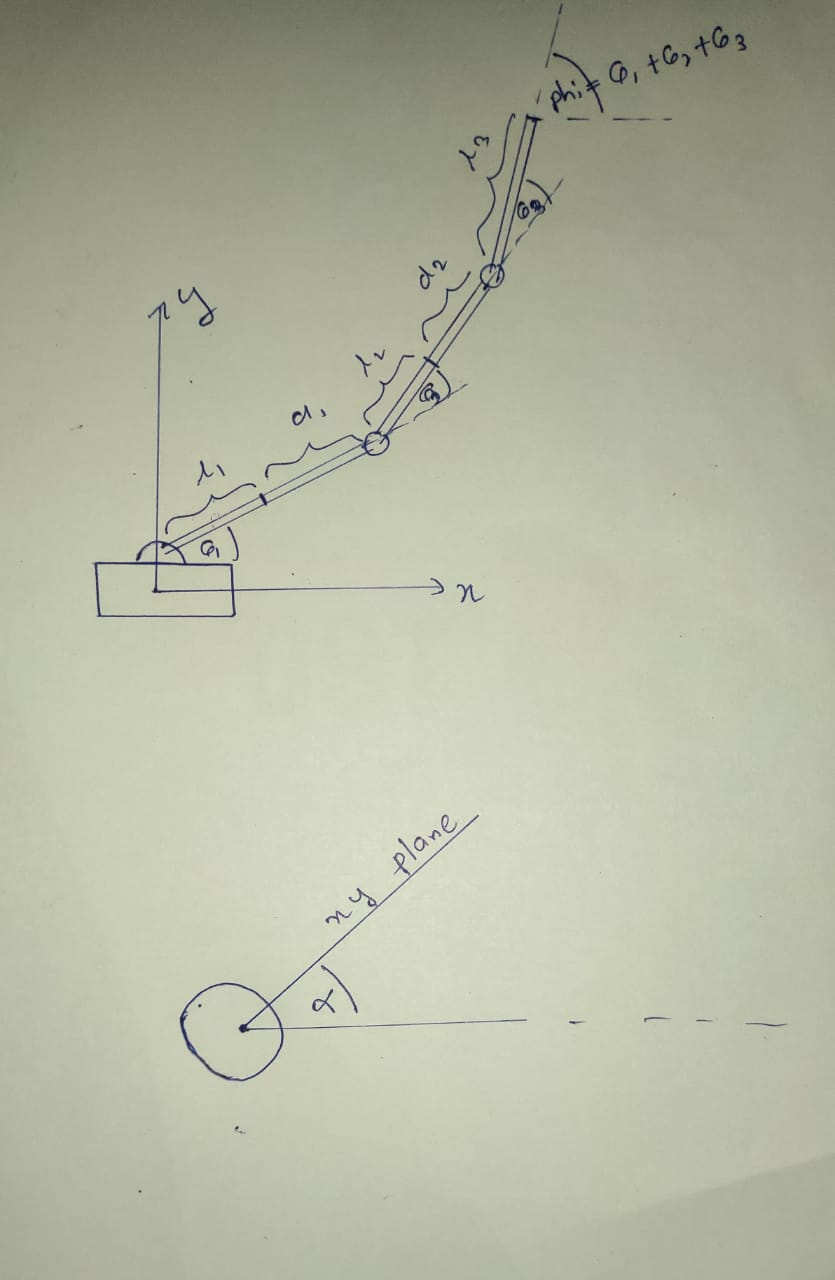

In [371]:
#define fixed lengths of robot arm links

l1=100
l2=100
l3=100



# calculate the angles to reach given cordinates

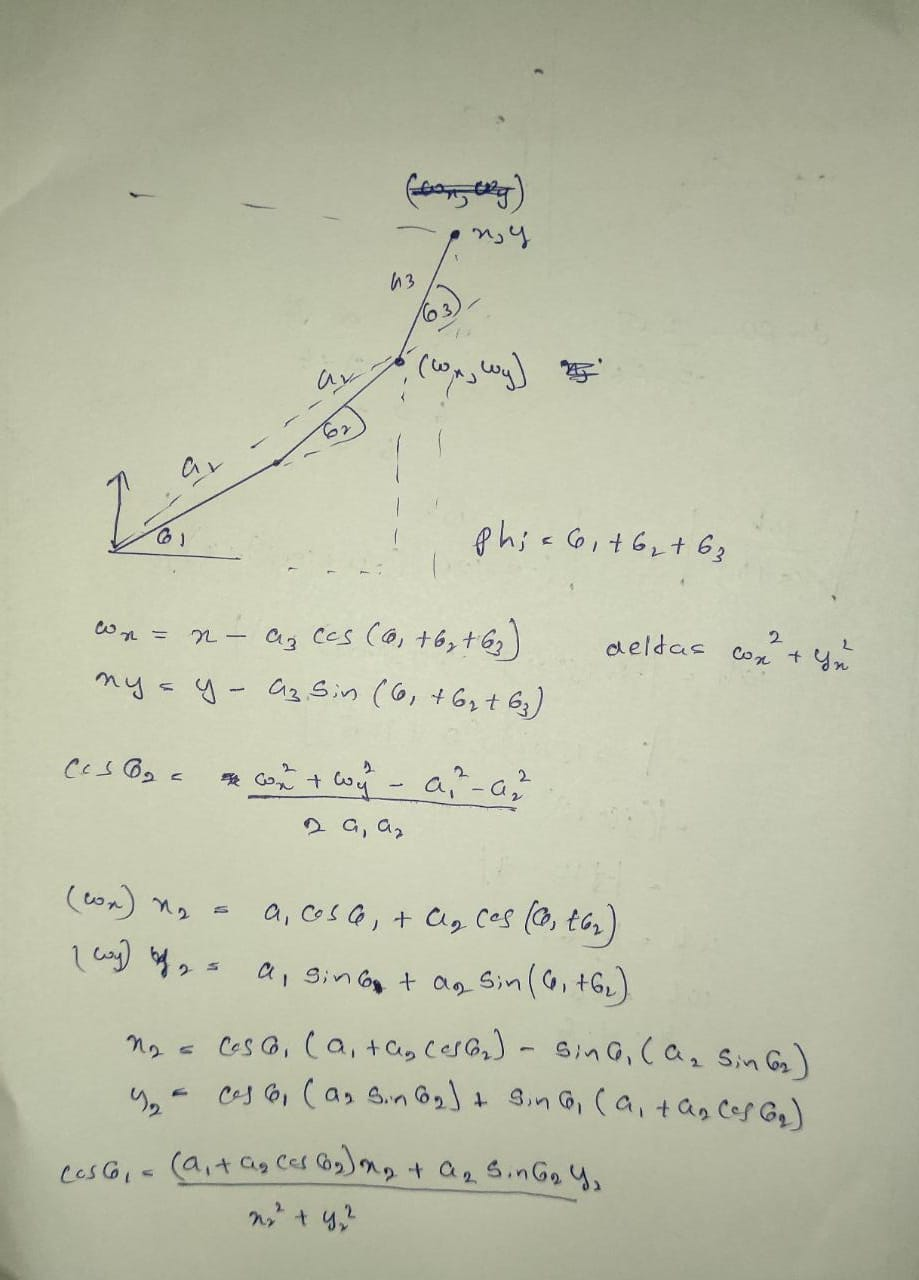

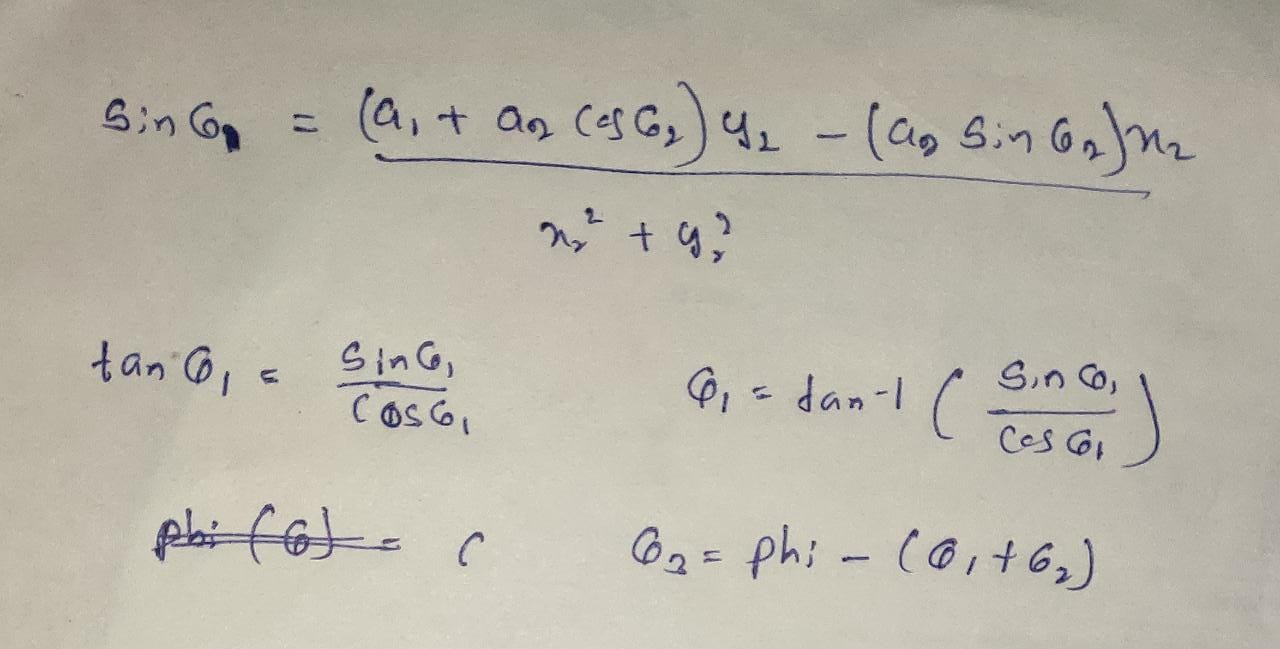

In [394]:


def angles(px,py,d1,d2):
    
    # Length of links in mm
    a1=l1+d1
    a2 =l2+d2
    a3 =l3+d3

    # Desired Position of End effector
   
    phi = 45
    phi = deg2rad(phi)

    # Equations for Inverse kinematics
    wx = px - a3*cos(phi)
    wy = py - a3*sin(phi)
 

    delta = wx**2 + wy**2
    c2 = ( delta -a1**2 -a2**2)/(2*a1*a2)
   
    s2 = sqrt(1-c2**2)  # elbow down


    theta_2 = arctan2(s2, c2)

    s1 = ((a1+a2*c2)*wy - a2*s2*wx)/delta
    c1 = ((a1+a2*c2)*wx + a2*s2*wy)/delta
    theta_1 = arctan2(s1,c1)
    theta_3 = phi-theta_1-theta_2



    #print('alpha: ', alpha*180/pi)
    #print('theta_1: ', theta_1*180/pi)
    #print('theta_2: ', theta_2*180/pi)
    #print('theta_3: ', theta_3*180/pi)
    
    return theta_1*180/pi ,theta_2*180/pi ,theta_3*180/pi

angles(600,600,200,200)

(21.09428821859609, 47.81142356280782, -23.90571178140391)

# adjust the links lengths 

In [395]:

d1m=200 #maximum lengths of each links
d2m=200


def parameters(px1,py1,px2,py2,d1,d2):
    D1=d1
    D2=d2
    D3=d3

    Lenth2=sqrt(px2**2 + py2**2)
    Lenth1=sqrt(px1**2 + py1**2)
    if Lenth2>Lenth1:
        if Lenth2>l1+l2+l3+d1m+d2m:
            print('out of the range')
            D2=d2m
            D1=d1m
        elif Lenth2>l1+l2+d1m:
            D2=Lenth2-l1+l2+d1m
            D1=d1m
        elif Lenth2>l1:
            D1=Lenth2-l1
            D2=d2m
    theta1,theta2,theta3=angles(px2,py2,D1,D2)
            
    return D1,D2,theta1,theta2,theta3
        
parameters(600,600,400,500,200,200)



(200, 200, 1.8243623033142766, 110.09285393029604, -66.91721623361032)

# give starting and final points codinates as input and initial lengths of links

In [396]:
starting_point=[600,600]
final_point=[400,500]
d1=200
d2=200


# path planning 
in this case we decide the linear path between starting and final points

In [397]:
def path_line(point1, point2):
    
    a = (point2[1] - point1[1])/(point2[0] - point1[0])
    b = point1[1] - a*point1[0]
    x = np.linspace(point1[0], point2[0], 10)
    y = a*x + b
   
    return (x,y)

[600.         577.77777778 555.55555556 533.33333333 511.11111111
 488.88888889 466.66666667 444.44444444 422.22222222 400.        ] [600.         588.88888889 577.77777778 566.66666667 555.55555556
 544.44444444 533.33333333 522.22222222 511.11111111 500.        ]


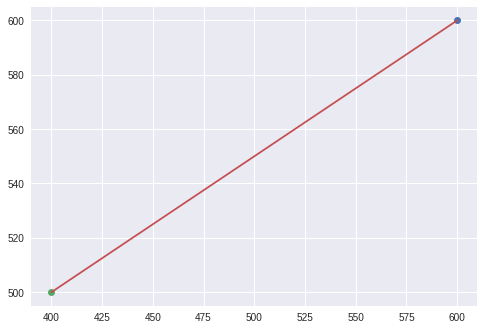

In [398]:
import matplotlib.pyplot as plt

point1 = starting_point
point2 = final_point
x,y = path_line(point1, point2)
print(x,y)

plt.plot(point1[0], point1[1], 'o')
plt.plot(point2[0], point2[1], 'o')
plt.plot(x,y)

# calculate angles and link lenghts for points of path

In [399]:
path=list(parameters(x[i],y[i],x[i+1],y[i+1],d1,d2) for i in range(len(x)-1))    
path

[(200, 200, 16.905719049691708, 57.90345957890039, -29.8091786285921),
 (200, 200, 13.521062667391954, 66.54799765401502, -35.06906032140697),
 (200, 200, 10.700009543750555, 74.24808210644018, -39.948091650190726),
 (200, 200, 8.323989656382578, 81.26739275168639, -44.59138240806895),
 (200, 200, 6.3302369601825434, 87.76302007121117, -49.093257031393705),
 (200, 200, 4.6871297657796225, 93.83590368405791, -53.523033449837534),
 (200, 200, 3.383434367888551, 99.55372377892668, -57.937158146815236),
 (200, 200, 2.423345658924561, 104.9625006366103, -62.385846295534876),
 (200, 200, 1.8243623033142766, 110.09285393029604, -66.91721623361032)]

# calculate the cordinates of joints 

In [400]:

def cordinates(D1,D2,theta1,theta2,theta3):
    theta1=math.radians(theta1)
    theta2=math.radians(theta2)
    theta3=math.radians(theta3)
    A1=D1+l1
    A2=D2+l2
    A3=l3
    x1=A1*cos(theta1)
    y1=A1*sin(theta1)
    x2=A1*cos(theta1)+A2*cos(theta1+theta2)
    y2=A1*sin(theta1)+A2*sin(theta1+theta2)
    x3=A1*cos(theta1)+A2*cos(theta1+theta2)+A3*cos(theta1+theta2+theta3)
    y3=A1*sin(theta1)+A2*sin(theta1+theta2)+A3*sin(theta1+theta2+theta3)
    return [0,x1,x2,x3],[0,y1,y2,y3]


In [402]:

path_xy=list(cordinates(i[0],i[1],i[2],i[3],i[4]) for i in path)
path_xy

[([0, 287.0353687467402, 365.64574342181356, 436.3564215404683],
  [0, 87.23930930734667, 376.75685453292465, 447.4675326515794]),
 ([0, 291.6852111512568, 343.42352119959133, 414.1341993182461],
  [0, 70.14084113871708, 365.64574342181356, 436.3564215404683]),
 ([0, 294.78382968514126, 321.201298977369, 391.91197709602375],
  [0, 55.70003371777818, 354.5346323107025, 425.24531042935723]),
 ([0, 296.83957818336245, 298.97907675514676, 369.68975487380146],
  [0, 43.43115038682989, 343.4235211995912, 414.13419931824603]),
 ([0, 298.1708719391882, 276.75685453292454, 347.4675326515793],
  [0, 33.07765298542533, 332.3124100884802, 403.02308820713495]),
 ([0, 298.9967302062336, 254.5346323107024, 325.2453104293571],
  [0, 24.51439018170246, 321.20129897736905, 391.9119770960238]),
 ([0, 299.4770799435835, 232.3124100884802, 303.02308820713495],
  [0, 17.705326556280045, 310.0901878662579, 380.80086598491266]),
 ([0, 299.7317053695134, 210.0901878662579, 280.80086598491266],
  [0, 12.6848254

# plot the robot arm - xy direction

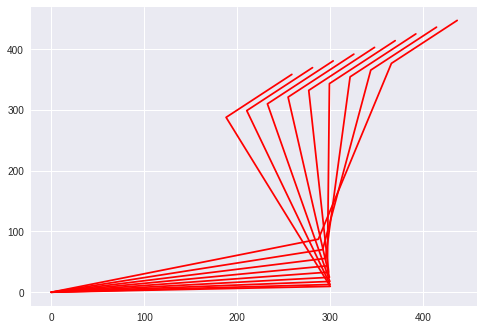

In [403]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from celluloid import Camera
plt.style.use('seaborn')


fig = plt.figure()


for i in range(0,len(path_xy)):

    plt.plot(path_xy[i][0],path_xy[i][1], linestyle = 'solid',color = 'red')

plt.show()
 

# plot the alpha(how xy plane change)

In [404]:
start_alpha=30
final_alpha=90
alphas = np.linspace(start_alpha,final_alpha, 10)
print(alphas)

[30.         36.66666667 43.33333333 50.         56.66666667 63.33333333
 70.         76.66666667 83.33333333 90.        ]


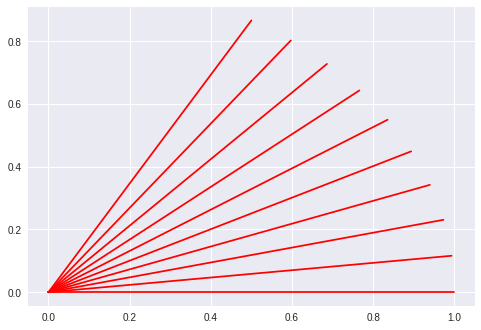

In [405]:
for i in range(0,len(alphas)):

    plt.plot([0,sin(math.radians(alphas[i]))],[0,cos(math.radians(alphas[i]))], linestyle = 'solid',color = 'red')

plt.show()